In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from ipywidgets import interact, FloatSlider
from IPython.display import display
import ipywidgets as widgets
from IPython.display import display
import time
import pickle

# Define the range of the sliders
slider_range = (-np.pi / 2, np.pi / 2)

# Define the function to plot points based on the variables
def plot_3d_points(coordinates):
    [x, y, z] = coordinates
    # Clear the previous plot and create a new one
    plt.figure(figsize=(8, 6))
    ax = plt.axes(projection='3d')
    
    # Plot points and connect them with lines
    ax.plot(x, y, z, marker='o', linestyle='-', color='b', markerfacecolor='r')
    
    # Set axis limits
    ax.set_xlim([-100, 100])
    ax.set_ylim([-60, 60])
    ax.set_zlim([-300, 20])
    
    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Show plot
    plt.show()

def plot_2d_points(coordinates):
    [x,y,z] = coordinates
    # Clear the previous plot and create a new one
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    
    # Plot points and connect them with lines
    ax.plot(y, z, marker='o', linestyle='-', color='b', markerfacecolor='r')
    
    # Set axis limits
    ax.set_xlim([-100, 100])
    ax.set_ylim([-300, 10])
    
    # Set labels
    ax.set_xlabel('Y')
    ax.set_ylabel('Z')
    
    # Show plot
    plt.show()

    # Plot points and connect them with lines

def plot_2d_points_for_animation(ax,coordinates):
    x,y,z = coordinates
    ax.clear()  # Clear the previous frame
    ax.plot(y, z, marker='o', linestyle='-', color='b', markerfacecolor='r')
    ax.set_xlim([-200, 200])
    ax.set_ylim([-300, 150])
    ax.set_xlabel('Y')
    ax.set_ylabel('Z')

def create_animation(coordinates_list, interval=500):
    """
    Create an animation from a list of y and z coordinate pairs.
    
    :param coordinates_list: List of tuples [(y1, z1), (y2, z2), ...].
    :param interval: Time between frames in milliseconds.
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    def update(frame):
        coordinate = coordinates_list[frame]
        plot_2d_points_for_animation(ax, coordinate)

    # Create animation
    ani = animation.FuncAnimation(
        fig, update, frames=len(coordinates_list), interval=interval, repeat=True
    )

    plt.show()

In [10]:
import bob
bob1 = bob.bob()
bob1.disable_torque()

# Example action function
t1 = time.time()

coordinates = []
interval = []
# Create and display the button with the action
x = 0
while x<60:
    print('start')
    t2 = time.time()
    bob1.update_reference_angle(t2-t1)
    interval.append(t2-t1)
    t1 = time.time()
    [left_coordinate,right_coordinate] = bob1.get_coordinates()
    print(bob1.joint_angles_right)
    print(bob1.roll)
    print(bob1.pitch)
    #plot_3d_points(right_coordinate)
    coordinates.append(left_coordinate)
    time.sleep(0.05)
    x += 1



start
[7, 4, 5, 1, 353]
2.2379869495632528e-06
0.0003384060101653332
start
[7, 4, 5, 1, 353]
-0.019358031917977084
0.11913326223318764
start
[7, 4, 5, 1, 353]
-0.021361308221634977
0.24422946499130543
start
[7, 4, 5, 1, 353]
-0.06292375137316766
0.3531337835313246
start
[7, 4, 5, 1, 353]
-0.009007464285288633
0.4513483854812993
start
[7, 4, 5, 1, 353]
0.07482884742879903
0.520330006324052
start
[7, 4, 5, 1, 353]
-0.03924202335975035
0.6760450228981669
start
[7, 4, 5, 1, 353]
-0.012385229002236604
0.7866605239173822
start
[7, 4, 5, 1, 353]
0.0595777205711236
0.8799285935052671
start
[7, 4, 5, 1, 353]
0.01291005131858647
1.0776126401626616
start
[7, 4, 5, 1, 353]
0.4487627036495504
0.9688502073409601
start
[7, 4, 5, 1, 353]
0.4516380979337007
1.1108491471607742
start
[7, 4, 5, 1, 353]
0.08427797378288952
1.4906800596968888
start
[7, 4, 5, 1, 353]
0.5421887689931733
1.4417165137727292
start
[7, 4, 5, 1, 353]
0.472542431695634
1.5455971674000804
start
[7, 4, 5, 1, 353]
0.42776638401494776


In [11]:
with open("sequence1.pkl",'wb') as file:
    pickle.dump((coordinates,interval),file)

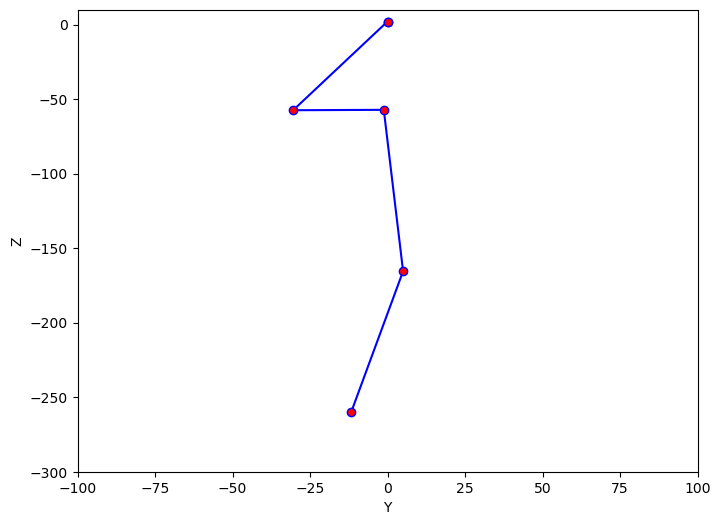

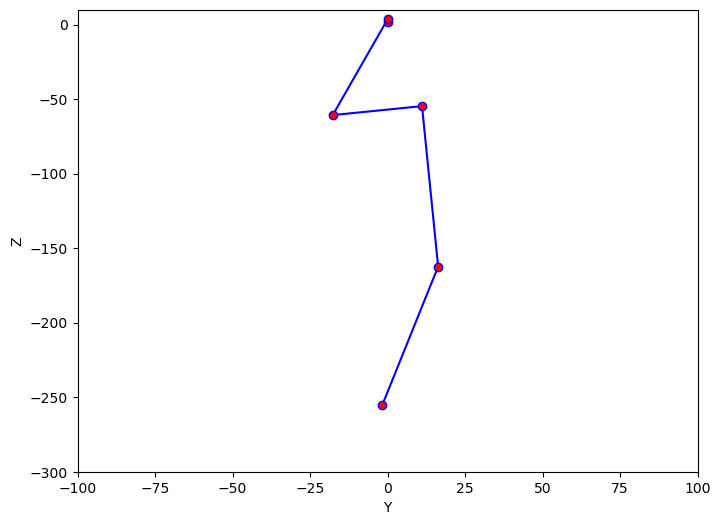

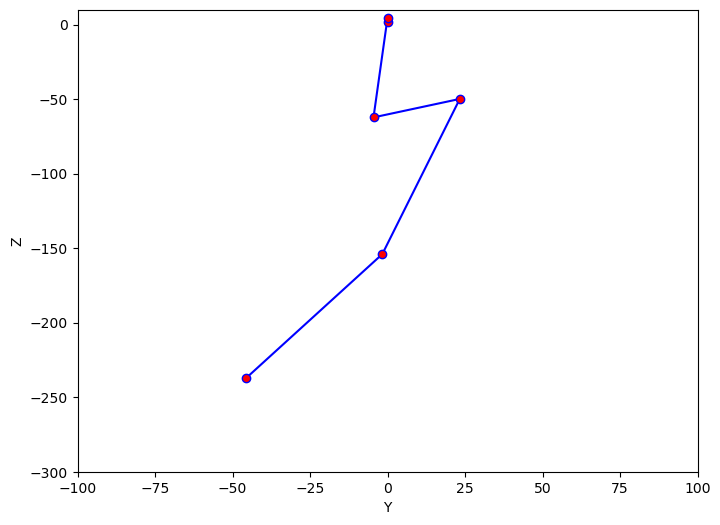

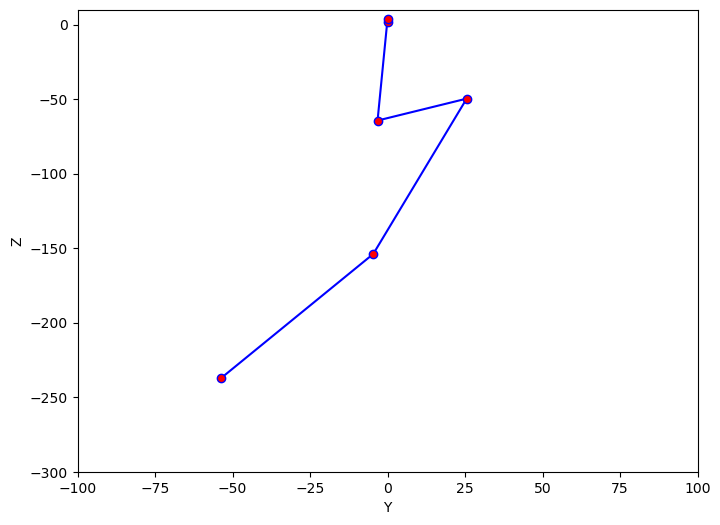

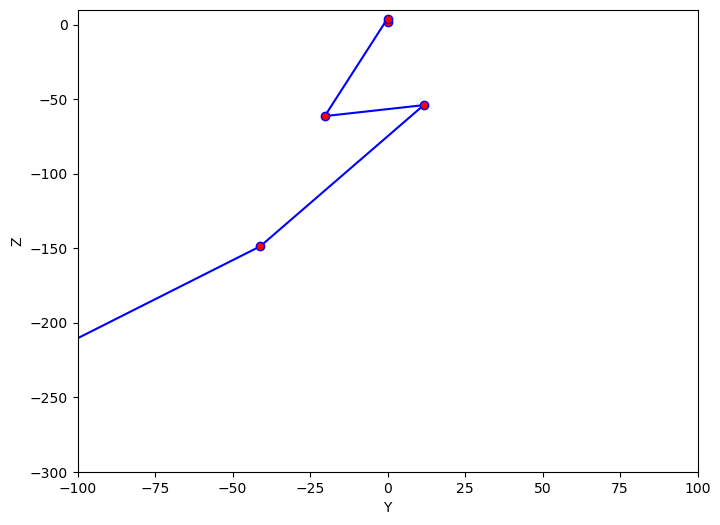

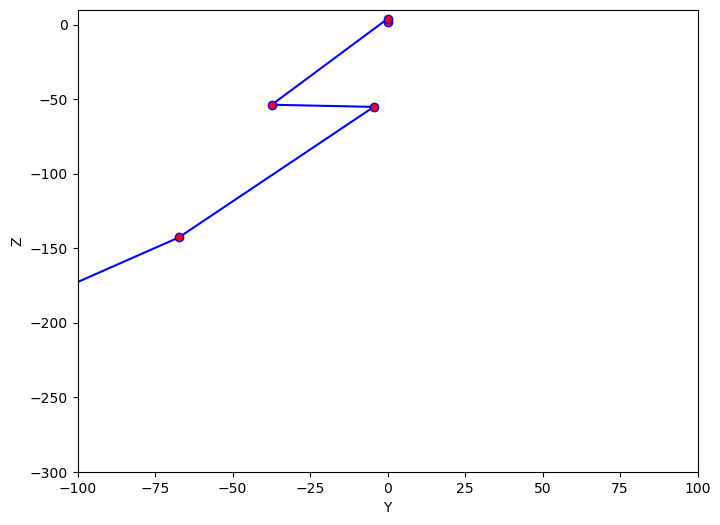

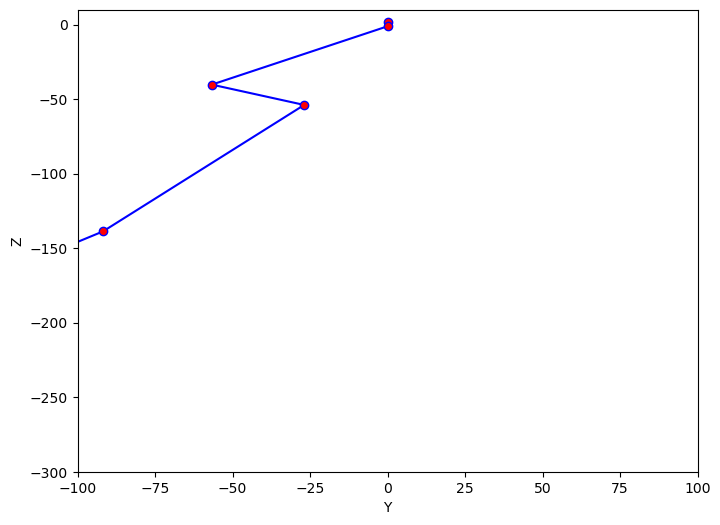

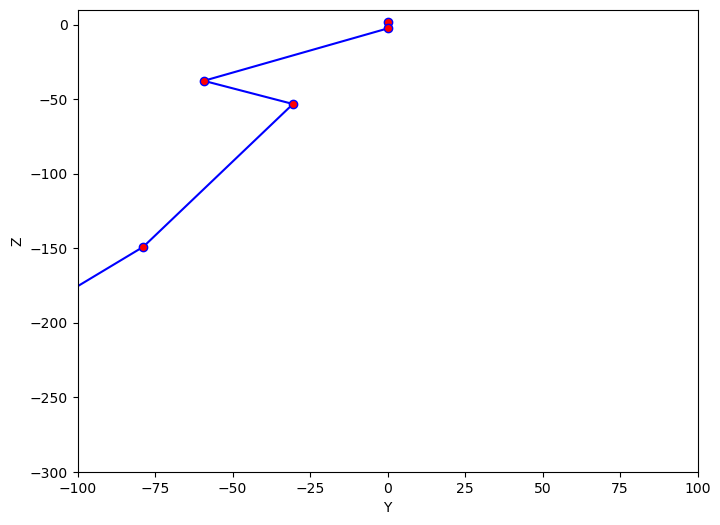

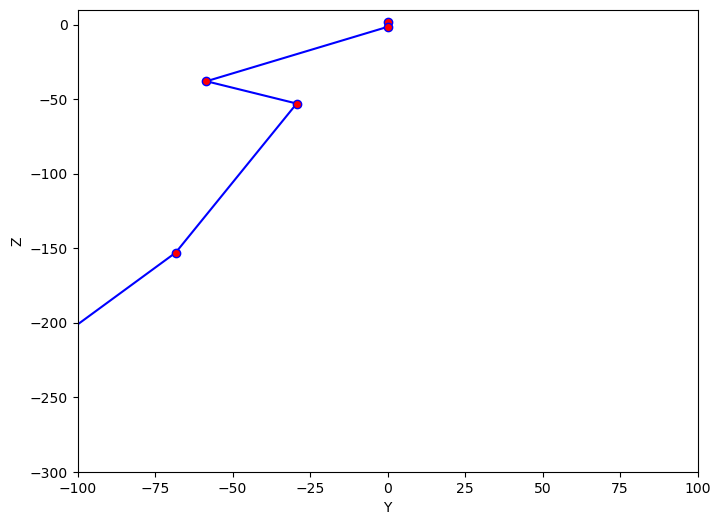

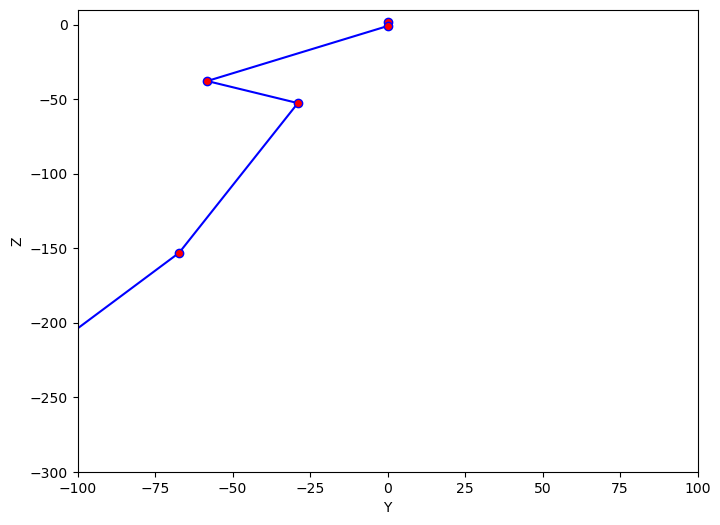

In [12]:
for i in range(10):
    plot_2d_points(coordinates[i])